# Tutorial: ECT for CW complexes

This tutorial walks you through how to build a CW complex with the `EmbeddedCW` class, and then use the `ECT` class to compute the Euler characteristic transform.\n\n**Note**: This tutorial uses `EmbeddedCW`, which is now an alias for the unified `EmbeddedComplex` class. The new unified class supports arbitrary dimensional cells beyond just 2-cells (faces). See `Tutorial-EmbeddedComplex.ipynb` for comprehensive coverage of the new capabilities.

In [1]:
from ect import ECT, EmbeddedCW
from ect.utils.examples import create_example_cw
import numpy as np


The CW complex class extends the `EmbeddedGraph` functionality with the ability to add faces (2-cells). With the new unified `EmbeddedComplex` class, you can now add cells of any dimension!\n\n**Face/Cell Addition Methods:**\n- `add_face(vertices)` - Add 2-cells (backward compatible)\n- `add_cell(vertices, dim=k)` - Add k-cells of any dimension (new!)\n\nFaces are added by passing in a list of vertices. We generally assume that these vertices form a cycle bounding an empty region, and that all boundary edges are already included in the complex.

<Axes: >

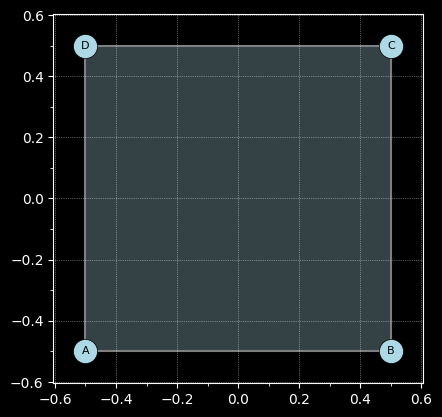

In [2]:
K = EmbeddedCW()

# Add vertices with coordinates
K.add_node("A", [0, 0])
K.add_node("B", [1, 0])
K.add_node("C", [1, 1])
K.add_node("D", [0, 1])

# Add edges to form a square
K.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")])

# Add the square face
K.add_face(["A", "B", "C", "D"])

K.center_coordinates()
K.plot()


 Just to have something a bit more interesting, let's make a more complicated example that's built into the class.

<Axes: >

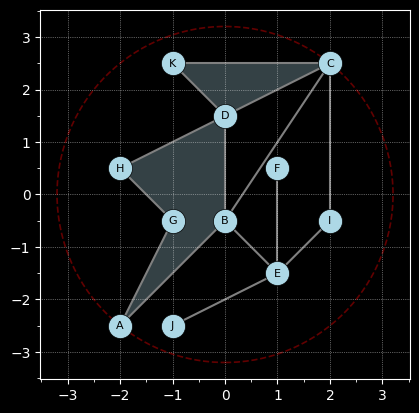

In [3]:
K = create_example_cw()
K.plot(bounding_circle=True)



 As with the `EmbeddedGraph` class, we can initialize the `ECT` class by deciding how many directions and how many thresholds to use.

In [4]:
ect = ECT(num_dirs=100, num_thresh=80)


 Then we can compute the ECC for a single direction. In this case, the $x$-axis will be computed for the `num_thresh=80` stopping points in the interval $[-1.2r,1.2r]$ where $r$ is the minimum bounding radius for the input complex.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


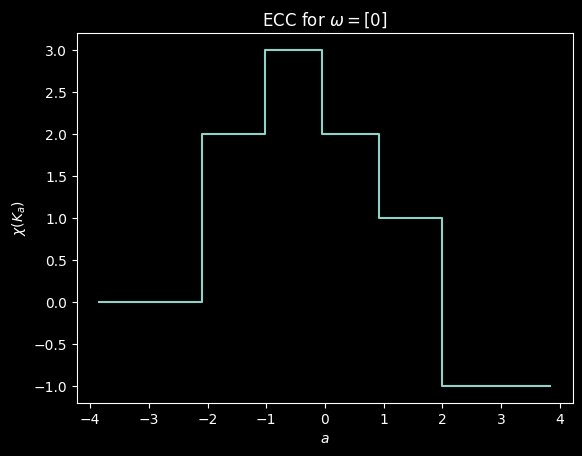

In [5]:
override_bound_radius = 1.2 * K.get_bounding_radius()
result = ect.calculate(K, theta=0, override_bound_radius=override_bound_radius)
result.plot();


 But of course it's easier to see this in a plot. This command calculates the ECC and immediately plots it.

 Similarly, we can compute the ECT and return the matrix. We make sure to internally set the bounding radius to use to control the $y$ axis of the plot.

<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

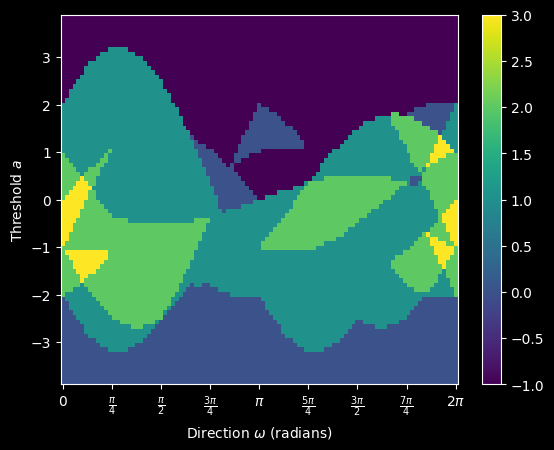

In [6]:
result = ect.calculate(K, override_bound_radius=override_bound_radius)
result.plot()


 We can also look at the Smooth ECT:

<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

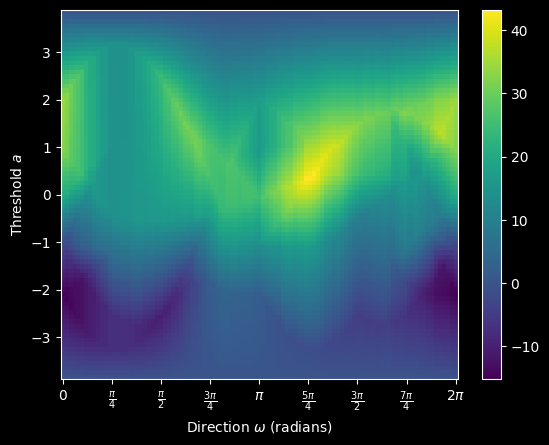

In [7]:
# Calculate SECT and plot
smooth = result.smooth()
smooth.plot()



 We can also compute the ECT in 3D.

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

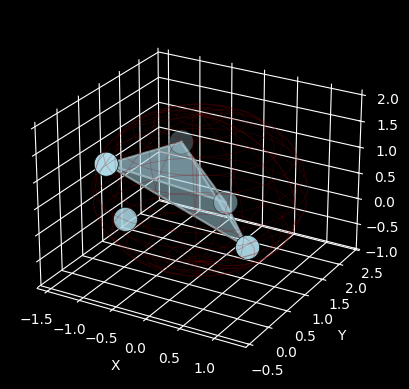

In [8]:
import numpy as np

vertices = [
    (letter, coordinates) for letter, coordinates in zip("abcde", np.random.randn(5, 3))
]
edges = [("a", "b"), ("a", "c"), ("a", "d"), ("b", "c"), ("b", "d"), ("c", "d")]
faces = [
    ("a", "b", "c"),
    ("a", "b", "d"),
    ("a", "c", "d"),
    ("b", "c", "d"),
    ("a", "b", "c", "d"),
]
K = EmbeddedCW()
K.add_nodes_from(vertices)
K.add_edges_from(edges)

K.add_faces_from(faces)
K.plot(bounding_circle=True)



<Axes: xlabel='Direction Index', ylabel='Threshold $a$'>

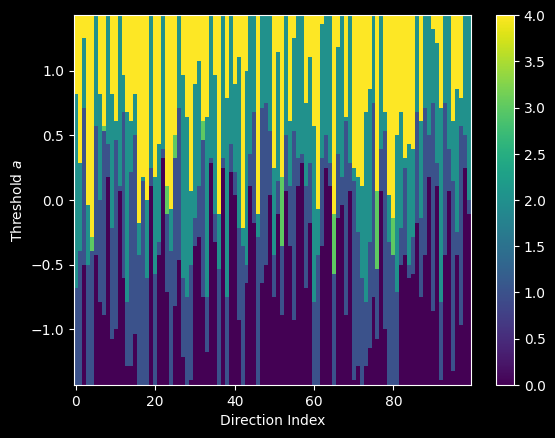

In [9]:
ect = ECT(num_dirs=100, num_thresh=80)
result = ect.calculate(K)
result.plot()
